# Coursework #3
## Advanced Data Manipulations, Creating Visualisations, and Flask

Harinath Selvaraj </br>

##### ******* Libraries to be Installed ******* 
seaborn </br>
matplotlib</br>
altair</br>
pandas</br>
numpy</br>
mysql

In [2]:
import mysql.connector as sql
import pandas as pd
import numpy as np
import datetime
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db_connection = sql.connect(host='localhost', database='PYTHON_DB', user='root', password='root')
df = pd.read_sql('SELECT * FROM scraped', con=db_connection)

## Section 1 - Data Cleanups

Checking the data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 20 columns):
id             398 non-null int64
last_scrape    398 non-null datetime64[ns]
url            398 non-null object
rr_start       366 non-null object
rr_end         398 non-null object
rr_outcome     398 non-null object
rr_dates       398 non-null object
rr_multiple    398 non-null int64
drug_name      398 non-null object
trade_name     398 non-null object
indication     398 non-null object
ncpe_year      398 non-null int64
eu_market      383 non-null object
company        398 non-null object
orphan         398 non-null int64
earliest       398 non-null object
latest         398 non-null object
ema_url        398 non-null object
ta_list        398 non-null object
rr_status      398 non-null object
dtypes: datetime64[ns](1), int64(4), object(15)
memory usage: 62.3+ KB


All columns have totally 398 values except the below two columns </br>
- 'rr_start' has 366 values
- 'eu_market' hsa 383 values

Getting all rows which has NULLS in the column - 'rr_start'

In [5]:
df[df['rr_start'].isna()]

,id,last_scrape,url,rr_start,rr_end,rr_outcome,rr_dates,rr_multiple,drug_name,trade_name,indication,ncpe_year,eu_market,company,orphan,earliest,latest,ema_url,ta_list,rr_status
12,2176,2018-12-13 16:25:58,http://www.ncpe.ie/drugs/agomelatine-valdoxan-4/,None,2013-04-10,,,0,Agomelatine (Valdoxan®),Valdoxan,Economic evaluation of Agomelatine (Valdoxan®)...,2009,2009-02-19,Les,0,2009-09-03,2009-12-11,https://www.ema.europa.eu/en/medicines/human/E...,"Depressive Disorder, Major",RR not conducted
45,2209,2018-12-13 16:28:11,http://www.ncpe.ie/drugs/boceprevir-victrelis/,None,2015-12-22,,,0,Boceprevir (Victrelis®),Victrelis,Economic evaluation of Boceprevir (Victrelis®)...,2012,2011-07-18,Merck,0,2011-08-19,2012-01-17,https://www.ema.europa.eu/en/medicines/human/E...,"Hepatitis C, Chronic",RR not conducted
70,2234,2018-12-13 16:29:44,http://www.ncpe.ie/drugs/certolizumab-pegol-ci...,None,2017-11-27,,,0,Certolizumab pegol (Cimzia®),Cimzia,Cost-effectiveness of certolizumab pegol (Cimz...,2010,2009-10-01,UCB,0,2010-03-13,2010-09-02,https://www.ema.europa.eu/en/medicines/human/E...,"Arthritis, Rheumatoid",RR not conducted
84,2248,2018-12-13 16:30:51,http://www.ncpe.ie/drugs/dabigatran-etexilate-...,None,2014-06-13,,,0,Dabigatran etexilate (Pradaxa®) – for the prev...,Pradaxa,Dabigatran etexilate (Pradaxa®) for the Preven...,2012,2008-03-17,Boehringer,0,2010-11-02,2012-10-03,https://www.ema.europa.eu/en/medicines/human/E...,"Arthroplasty, Replacement; Venous Thromboembolism",RR not conducted
85,2249,2018-12-13 16:30:57,http://www.ncpe.ie/drugs/dabigatran-etexilate-...,None,2014-06-13,,,0,Dabigatran Etexilate (Pradaxa®) for the Primar...,Pradaxa,Economic Evaluation of the Cost Effectiveness ...,2008,2008-03-17,Boehringer,0,2008-07-01,2008-09-01,https://www.ema.europa.eu/en/medicines/human/E...,"Arthroplasty, Replacement; Venous Thromboembolism",RR not conducted
100,2264,2018-12-13 16:32:04,http://www.ncpe.ie/drugs/denosumab-prolia/,None,2013-01-04,,,0,Denosumab (Prolia®),Prolia,The Cost-effectiveness of Denosumab (Prolia®) ...,2010,2010-05-26,Amgen,0,2010-05-27,2010-07-01,https://www.ema.europa.eu/en/medicines/human/E...,"Bone Resorption; Osteoporosis, Postmenopausal",RR not conducted
101,2265,2018-12-13 16:32:08,http://www.ncpe.ie/drugs/denosumab-xgeva-3/,None,2013-01-04,,,0,Denosumab (Xgeva®),Xgeva,Cost-effectiveness of denosumab (Xgeva®) for t...,2011,2011-07-13,Amgen,0,2011-08-15,2011-12-08,https://www.ema.europa.eu/en/medicines/human/E...,"Fractures, Bone; Neoplasm Metastasis",RR not conducted
113,2277,2018-12-13 16:32:53,http://www.ncpe.ie/drugs/eculizumab-soliris/,None,2017-11-24,,,0,Eculizumab (Soliris®),Soliris,An Economic Evaluation of Eculizumab (Soliris®...,2013,2007-06-20,Alexion,1,2010-01-01,2013-10-14,https://www.ema.europa.eu/en/medicines/human/E...,"Hemoglobinuria, Paroxysmal",RR not conducted
137,2301,2018-12-13 16:34:36,http://www.ncpe.ie/drugs/evolocumab-repatha/,None,2011-10-14,,,0,Evolocumab (Repatha®),Repatha,Evolocumab (Repatha®) is indicated for both pr...,2018,2015-07-17,Amgen,0,2016-01-01,2018-05-16,https://www.ema.europa.eu/en/medicines/human/E...,Dyslipidemias; Hypercholesterolemia,RR not conducted
146,2310,2018-12-13 16:35:12,http://www.ncpe.ie/drugs/gefitinib-iressa/,None,2017-08-15,,,0,Gefitinib (Iressa®),Iressa,A review of the economic evaluation of oral ge...,2010,2009-06-24,AstraZeneca,0,2010-06-16,2010-11-05,https://www.ema.europa.eu/en/medicines/human/E...,"Carcinoma, Non-Small-Cell Lung",RR not conducted


There are 32 rows which has NULL for 'rr_start'.

Logic to populate the NULL in 'rr_start': </br>

- Store the data which has NOT NULL values for 'rr_start' in a separate dataframe - 'df_skip_na_rr_start'
- Find the mean of the diffrence between 'rr_end' and 'rr_start' dates
- Use the mean value to populate the NULL values in 'rr_start' date

Below is the code which performs the above mentioned operations

In [6]:
df_skip_na_rr_start = df[df['rr_start'].isna() == False]

In [7]:
mean_days  = (df_skip_na_rr_start['rr_end'] - df_skip_na_rr_start['rr_start']).mean()
mean_days

Timedelta('32 days 01:30:29.508196')

On an average, there is 32 days difference between 'rr_start' and 'rr_end' dates. This can be used to populate the missing 'rr_start' date. 

Logic for populating : For NULL values of 'rr_start' date, The calculated date will be ('rr_end' - 'mean_days')

Taking an example of a row to visually see the changes

In [8]:
df.iloc[12]

id                                                          2176
last_scrape                                  2018-12-13 16:25:58
url             http://www.ncpe.ie/drugs/agomelatine-valdoxan-4/
rr_start                                                    None
rr_end                                                2013-04-10
rr_outcome                                                      
rr_dates                                                        
rr_multiple                                                    0
drug_name                                Agomelatine (Valdoxan®)
trade_name                                              Valdoxan
indication     Economic evaluation of Agomelatine (Valdoxan®)...
ncpe_year                                                   2009
eu_market                                             2009-02-19
company                                                      Les
orphan                                                         0
earliest                 

The value of 'rr_start' is NULL in the above result. It should be converted to '2013-04-10' minus 32 days

The below code will fill NULLs

In [9]:
values = {'rr_start' : df['rr_end'] -  pd.to_timedelta(mean_days, unit='d')}
df =df.fillna(value=values)

After Changes

In [10]:
df.iloc[12]

id                                                          2176
last_scrape                                  2018-12-13 16:25:58
url             http://www.ncpe.ie/drugs/agomelatine-valdoxan-4/
rr_start                                              2013-03-09
rr_end                                                2013-04-10
rr_outcome                                                      
rr_dates                                                        
rr_multiple                                                    0
drug_name                                Agomelatine (Valdoxan®)
trade_name                                              Valdoxan
indication     Economic evaluation of Agomelatine (Valdoxan®)...
ncpe_year                                                   2009
eu_market                                             2009-02-19
company                                                      Les
orphan                                                         0
earliest                 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 20 columns):
id             398 non-null int64
last_scrape    398 non-null datetime64[ns]
url            398 non-null object
rr_start       398 non-null object
rr_end         398 non-null object
rr_outcome     398 non-null object
rr_dates       398 non-null object
rr_multiple    398 non-null int64
drug_name      398 non-null object
trade_name     398 non-null object
indication     398 non-null object
ncpe_year      398 non-null int64
eu_market      383 non-null object
company        398 non-null object
orphan         398 non-null int64
earliest       398 non-null object
latest         398 non-null object
ema_url        398 non-null object
ta_list        398 non-null object
rr_status      398 non-null object
dtypes: datetime64[ns](1), int64(4), object(15)
memory usage: 62.3+ KB


##### Column 'eu_market' 

There are 15 NaT entries in the column - 'eu_market'.

In [12]:
df[df['eu_market'].isna().sort_values(inplace=False, na_position='last')]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,last_scrape,url,rr_start,rr_end,rr_outcome,rr_dates,rr_multiple,drug_name,trade_name,indication,ncpe_year,eu_market,company,orphan,earliest,latest,ema_url,ta_list,rr_status
4,2168,2018-12-13 16:24:49,http://www.ncpe.ie/drugs/aceclofenac-vitafen/,2016-12-21,2017-01-24,Following a resubmission of the rapid review a...,"2016-12-21, 2017-01-24",0,Aceclofenac (Vitafen®),Vitafen,Aceclofenac (Vitafen®) is indicated for the re...,2017,None,Unknown,0,2016-07-22,2017-11-01,,Unknown,HTA recommended at submitted price
19,2183,2018-12-13 16:26:29,http://www.ncpe.ie/drugs/amsacrine-amsidine/,2017-01-10,2017-02-15,Full Pharmacoeconomic Evaluation not Recommended,"2017-01-10, 2017-02-15",0,Amsacrine (Amsidine®),Amsidine,Amsidine® is indicated for the induction and m...,2017,None,Unknown,0,2017-01-10,2017-02-15,,Unknown,No HTA
32,2196,2018-12-13 16:27:24,http://www.ncpe.ie/drugs/azelastine-hydrochlor...,2013-02-12,2013-02-28,Full Pharmacoeconomic Assessment not Recommended.,"2013-02-12, 2013-02-28",0,Azelastine hydrochloride and fluticasone propi...,Dymista,Indicated for symptomatic treatment of moderat...,2013,None,Unknown,0,2013-02-12,2013-02-28,,Unknown,No HTA
155,2319,2018-12-13 16:35:56,http://www.ncpe.ie/drugs/grass-pollen-allergen...,2011-10-11,2011-09-26,Full Pharmacoeconomic Evaluation not Recommended,"2011-10-11, 2011-09-26",0,Grass pollen allergen extract (Oralair®),Oralair,Grass pollen allegen extract (Oralair®) for t...,2011,None,Unknown,0,2011-09-26,2011-10-01,,Unknown,No HTA
171,2335,2018-12-13 16:37:04,http://www.ncpe.ie/drugs/indacaterol-onbrez/,2010-01-15,2010-01-15,Full Pharmacoeconomic Evaluation not Recommended.,2010-01-15,0,Indacaterol (Onbrez®),Onbrez,Review of Indacaterol (Onbrez®) for the treatm...,2010,None,Unknown,0,2010-01-15,2010-01-15,,Unknown,No HTA
175,2339,2018-12-13 16:37:21,http://www.ncpe.ie/drugs/insulin-aspart-novora...,2014-07-22,2014-08-28,Full pharmacoeconomic evaluation recommended a...,"2014-07-22, 2014-08-28",0,Insulin aspart (NovoRapid® FlexTouch ®),NovoRapid FlexTouch,Insulin aspart (NovoRapid® FlexTouch ®) is ind...,2014,None,Unknown,0,2014-07-22,2014-08-28,,Unknown,HTA recommended at submitted price
202,2366,2018-12-13 16:39:28,http://www.ncpe.ie/drugs/levodopa-20mgml-carbi...,2013-03-13,2013-04-16,Full Pharmacoeconomic Evaluation Recommended.,"2013-03-13, 2013-04-16",0,Levodopa 20mg/ml + carbidopa monohydrate 5mg i...,Duodopa,For the treatment of advanced levodopa-respons...,2018,None,Unknown,0,2013-03-13,2018-12-05,,Unknown,HTA recommended at submitted price
205,2369,2018-12-13 16:39:44,http://www.ncpe.ie/drugs/levonorgestrel-intrau...,2013-03-07,2013-03-25,Full Pharmacoeconomic Assessment Not Recommended,"2013-03-07, 2013-03-25",0,Levonorgestrel intrauterine system LNG-IUS (Ja...,Jaydess,Levonorgestrel Intrauterine System LNG-IUS (Ja...,2013,None,Unknown,0,2013-03-07,2013-03-25,,Unknown,No HTA
206,2370,2018-12-13 16:39:46,http://www.ncpe.ie/drugs/lidocaine-5-plasters-...,2010-09-09,2010-10-22,Full Pharmacoeconomic Evaluation Recommended.,"2010-09-09, 2010-10-22",0,Lidocaine 5% plasters (Versatis®),Versatis,Symptomatic relief of neuropathic pain associa...,2015,None,Unknown,0,2010-09-09,2015-09-24,,Unknown,HTA recommended at submitted price
217,2381,2018-12-13 16:40:24,http://www.ncpe.ie/drugs/lotemax-0-5-eye-drops...,2011-11-15,2011-12-05,Full Pharmacoeconomic Evaluation not Recommended,"2011-11-15, 2011-12-05",0,Lotemax 0.5% eye drops suspension (Loteprednol),Loteprednol,Indicated for treatment of post-operative inf...,2011,None,Unknown,0,2011-11-15,2011-12-05,,Unknown,No HTA


Logic to populate the NULL in 'eu_market': </br>

- Store the data which has NOT NULL values for 'rr_start' in a separate dataframe - 'df_skip_na_eu_market'
- Find the mean of the diffrence between 'rr_start' and 'eu_market' dates
- Use the mean value to populate the NULL values in 'eu_market' date

Below is the code which performs the above mentioned operations

In [13]:
df_skip_na_eu_market = df[df['eu_market'].isna() == False]

In [14]:
mean_days_eu_market  = (df_skip_na_eu_market['rr_start'] - df_skip_na_eu_market['eu_market']).mean()
mean_days_eu_market

Timedelta('1083 days 19:06:44.177545')

On an average, there is 1083 days difference between 'rr_start' and 'eu_market' dates. This can be used to populate the missing 'eu_market' date. 

Logic for populating : For NULL values of 'eu_market' date, The calculated date will be ('rr_start' - 'mean_days_eu_market')

Taking an example of a row to visually see the changes

In [15]:
df.iloc[4]

id                                                          2168
last_scrape                                  2018-12-13 16:24:49
url                http://www.ncpe.ie/drugs/aceclofenac-vitafen/
rr_start                                              2016-12-21
rr_end                                                2017-01-24
rr_outcome     Following a resubmission of the rapid review a...
rr_dates                                  2016-12-21, 2017-01-24
rr_multiple                                                    0
drug_name                                 Aceclofenac (Vitafen®)
trade_name                                               Vitafen
indication     Aceclofenac (Vitafen®) is indicated for the re...
ncpe_year                                                   2017
eu_market                                                   None
company                                                  Unknown
orphan                                                         0
earliest                 

The value of 'eu_market' is NULL in the above result. It should be converted to '2016-12-21' minus 1083 days

The below code will fill NULLs

In [16]:
values = {'eu_market' : df['rr_start'] -  pd.to_timedelta(mean_days_eu_market, unit='d')}
df =df.fillna(value=values)

After Changes - 

In [17]:
df.iloc[4]

id                                                          2168
last_scrape                                  2018-12-13 16:24:49
url                http://www.ncpe.ie/drugs/aceclofenac-vitafen/
rr_start                                              2016-12-21
rr_end                                                2017-01-24
rr_outcome     Following a resubmission of the rapid review a...
rr_dates                                  2016-12-21, 2017-01-24
rr_multiple                                                    0
drug_name                                 Aceclofenac (Vitafen®)
trade_name                                               Vitafen
indication     Aceclofenac (Vitafen®) is indicated for the re...
ncpe_year                                                   2017
eu_market                                             2014-01-03
company                                                  Unknown
orphan                                                         0
earliest                 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 20 columns):
id             398 non-null int64
last_scrape    398 non-null datetime64[ns]
url            398 non-null object
rr_start       398 non-null object
rr_end         398 non-null object
rr_outcome     398 non-null object
rr_dates       398 non-null object
rr_multiple    398 non-null int64
drug_name      398 non-null object
trade_name     398 non-null object
indication     398 non-null object
ncpe_year      398 non-null int64
eu_market      398 non-null object
company        398 non-null object
orphan         398 non-null int64
earliest       398 non-null object
latest         398 non-null object
ema_url        398 non-null object
ta_list        398 non-null object
rr_status      398 non-null object
dtypes: datetime64[ns](1), int64(4), object(15)
memory usage: 62.3+ KB


Now, all columns have 398 values.

Changing the datatype - </br>The below columns has datatype - object. Since it stores dates, it has to be converted to datatype - 'date'
rr_dates, rr_start, rr_end, eu_market, earliest, latest

Changing the datatype of "rr_start" from object to datetime

In [19]:
df['rr_start'] =  pd.to_datetime(df['rr_start'], format='%Y-%m-%d')

Changing the datatype of "rr_end" from object to datetime

In [20]:
df['rr_end'] =  pd.to_datetime(df['rr_end'], format='%Y-%m-%d')

Changing the datatype of "earliest" from object to datetime

In [21]:
df['earliest'] =  pd.to_datetime(df['earliest'], format='%Y-%m-%d')

Changing the datatype of "latest" from object to datetime

In [22]:
df['latest'] =  pd.to_datetime(df['latest'], format='%Y-%m-%d')

##### Why I can't drop column - RR_DATES ?

The values in the column - 'rr_dates' are already present in the columns - 'rr_start' and 'rr_end' however for some rows, it has more than 2 dates. Those corresponding rows has rr_multiple = 1. Therefore, it can't be deleted

Code to get the NaT values in column - eu_market

Converting the column 'eu_market' to datetime

In [23]:
df['eu_market'] =  pd.to_datetime(df['eu_market'], format='%Y-%m-%d')

There are many duplicates in rr_outcome column. Therefore, the below operations were performed<br />
Convert to lower case<br />
Remove full stop<br />
Trim the text<br />

##### The below code is used to check the unique values in the column - rr_outcome

In [24]:
df['rr_outcome'].unique()

array(['Full Pharmacoeconomic Assessment Recommended',
       'A full pharmacoeconomic assessment is recommended',
       'Full Pharmacoeconomic Evaluation Recommended.',
       'Following a resubmission of the rapid review a full pharmacoeconomic evaluation is recommended at the submitted price.',
       'Full Pharmacoeconomic Evaluation Not Recommended',
       'Full Pharmacoeconomic Evaluation Recommended at submitted price.',
       'Full Pharmacoeconomic Evaluation not Recommended',
       'Full HTA not recommended',
       'Full Pharmacoeconomic Evaluation Recommended', '',
       'Full pharmacoeconomic evaluation recommended',
       'Full HTA Recommended',
       'Full Pharmacoeconomic Evaluation not Recommended.',
       'Full pharmacoeconomic evaluation not recommended',
       'Full pharmacoeconomic assessment recommended',
       'A full HTA is recommended to assess the clinical effectiveness and cost effectiveness of  axi-cel compared with the current standard of care.\n '

Before Changes

In [25]:
df['rr_outcome'].head(5)

0         Full Pharmacoeconomic Assessment Recommended
1    A full pharmacoeconomic assessment is recommended
2        Full Pharmacoeconomic Evaluation Recommended.
3        Full Pharmacoeconomic Evaluation Recommended.
4    Following a resubmission of the rapid review a...
Name: rr_outcome, dtype: object

Code Change

In [26]:
df['rr_outcome'] = df['rr_outcome'].str.lower().str.replace('.','').str.replace('\n','').str.replace('a full','full').str.strip()

After Changes

In [27]:
df['rr_outcome'].head(5)

0         full pharmacoeconomic assessment recommended
1      full pharmacoeconomic assessment is recommended
2         full pharmacoeconomic evaluation recommended
3         full pharmacoeconomic evaluation recommended
4    following a resubmission of the rapid review f...
Name: rr_outcome, dtype: object

## Section 2 - Five Data Visualization

#### 1) Amount of Drugs registered Year-wise in NCPE Website

##### Plotting Type : Altair Barplot

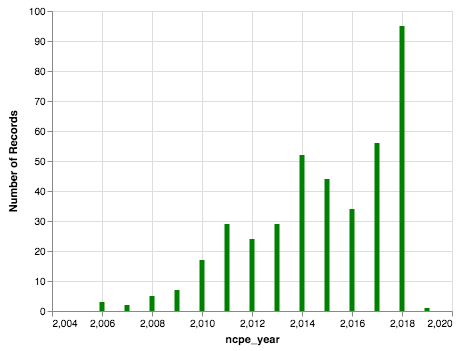

In [28]:
alt.Chart(df).mark_bar(color='green').encode(
    x= alt.X('ncpe_year'),
    y= 'count()')

##### Reason for Visualization 1:
This graph is important since it provides a rough idea of how many drugs were present in NCPE database for all the years. 


##### Information obtained from Visualization 1:
It is observed that the No.of drugs were inreasing from 2004 to 2018. There is a slight decrease in the year - 2016. The year - 2018 has highest number of drugs found in NCPE Database

#### 2) Top 5 Medical Symptoms for which the manufacturers(pharamaceutical companies) had submitted their medicines for approval by NCPE

##### Plotting Type : Seaborn Barplot

The value - "Unknown" is also present in the column - 'ta_list'. Therefore, it is removed while plotting

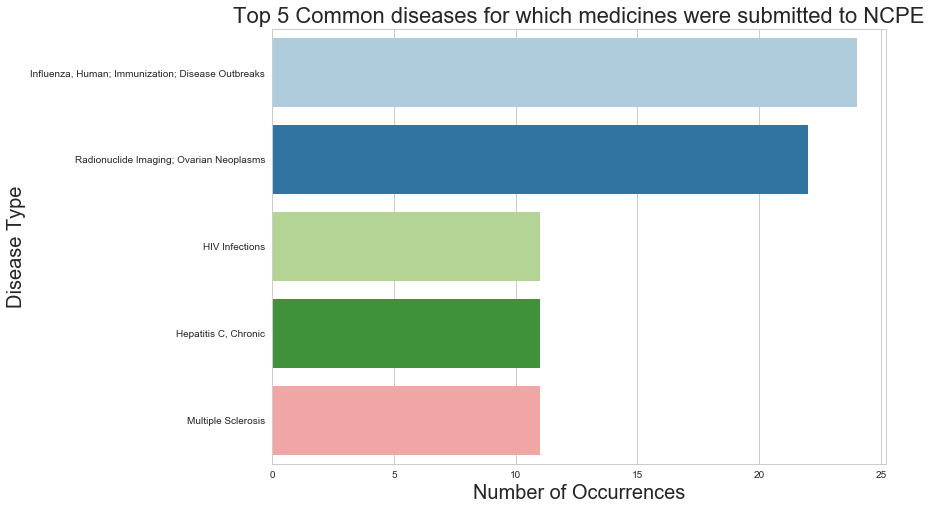

In [29]:
sns.set(style="whitegrid")
ta_list_count  = df['ta_list'].value_counts()
ta_list_count = ta_list_count[:6,]
ta_list_count = ta_list_count.drop('Unknown')
plt.figure(figsize=(11,8))
sns.barplot(ta_list_count.values, ta_list_count.index, alpha=1,palette=("Paired"))
plt.title('Top 5 Common diseases for which medicines were submitted to NCPE', fontsize=22)
plt.xlabel('Number of Occurrences', size="20")
plt.ylabel('Disease Type', size="20")
plt.show()

##### Reason for Visualization 2:
When I found the distinct entries in the column - 'ta_list', it looked like a disease names. So, I wanted to see the most common diseases for which the drugs were found in NCPE database.


##### Information obtained from Visualization 2:
On an overall basis, Many Companies have applied for liscence from NCPE for critical diseases such as Influenza, Radionuclide Imaging, Hepatitis followed by HIV Infections and Multiple Sclerosis. This conveys that those medicines were highly in demand and it led to the spike in the production of new medicines for those diseases and thereby obtain approval from NCPE

#### 3) Company-wise percentage of total drugs in NCPE Database

##### Plotting Type : Matplotlib pie chart

Select Top 8 companies

In [30]:
company_count = df['company'].value_counts()[:8]

Get rest of the Companies other than top 8

In [31]:
top_others_company_count = df['company'].value_counts()[8:]

Taking the Sum of counts of other companies and adding as 'Others' to the series

In [32]:
sum_of_others = np.sum(top_others_company_count.values)
s1 = pd.Series([sum_of_others], index=['Others'])
company_count = company_count.append(s1)

dropping 'Unknown' company name

In [33]:
company_count = company_count.drop('Unknown')

Plotting the company-wise percentage of drugs in NCPE Database

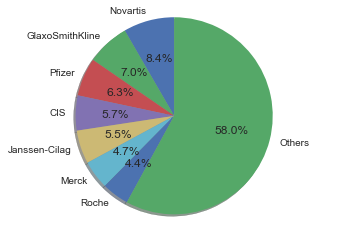

In [34]:
from matplotlib import cm
labels = company_count.index
sizes = company_count.values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

##### Reason for Visualization 3:
I wanted to see the distribution of pharameceutial companies found in NCPE database. This will help to understand the top companies which applied for NCPE liscence.

##### Information obtained from Visualization 3:
This chart shows that 'Novartis' had the higest number of drugs submitted to NCPE followed by 'GlaxoSmithKline' and 'Pfizer'. Although, 'GlaxoSmithKline' and 'Pfizer' are large companies, they only contribute below 10% of the total drugs in NCPE Database. This denotes that there are many small players (about 58%) in the pharameceutial field who contribute less than 4.4% individually.

#### 4) Year-wise Comparision of RR Outcome Results

##### Plotting Type : Matplotlib stacked bar chart

I wanted to see how many drugs were recommended by NCPE for the different years. </br>

<strong>Challenge</strong> - The field 'rr_outcome' has free flow text. Therefore, I used the below logic which will convert them for my graph.

A new column - 'rr_outcome_type' is added. Below is the logic for populating the new column <br/>

If 'rr_outcome' doesn't contain word 'not recommended', the value will be populated as 'True', else 'False'will be populated

In [35]:
df['rr_outcome_type'] = ~df['rr_outcome'].str.contains('not recommended')
df['rr_outcome_type'] = df['rr_outcome_type'].replace(False,'Not Recommended').replace(True,'Recommended')

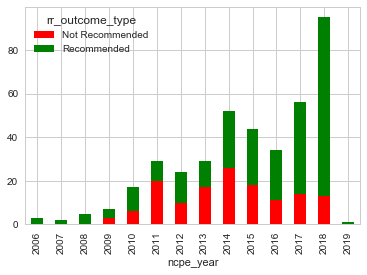

In [36]:
df2 = df.groupby(['ncpe_year','rr_outcome_type'])['ncpe_year'].count().unstack('rr_outcome_type').fillna(0)
df2.plot(kind='bar', stacked=True, color=['red', 'green'])

##### Reason for Visualization 4:

This is an important chart to understand what is the ratio of drugs that were approved/rejected by NCPE for various years.

##### Information obtained from Visualization 4:
Higher rejections are found in the years - 2011, 2013 and 2014. There is a gradual decrease in the number of rejections in the recent years. Pharamaceutical companies may have done rigorous tests (for their new drugs) in their labs before applying for NCPE liscence.

#### 5) Find the distribution of medicines in NCPE database according to 'rr_status'

See the unique values in the column - 'rr_status' before doing the graph

In [37]:
df['rr_status'].value_counts()

HTA recommended at submitted price    224
No HTA                                122
RR not conducted                       32
Reimbursement not recommended           7
No HTA at submitted price               7
Unknown                                 3
Reimbursement without HTA               2
No HTA until more evidence              1
Name: rr_status, dtype: int64

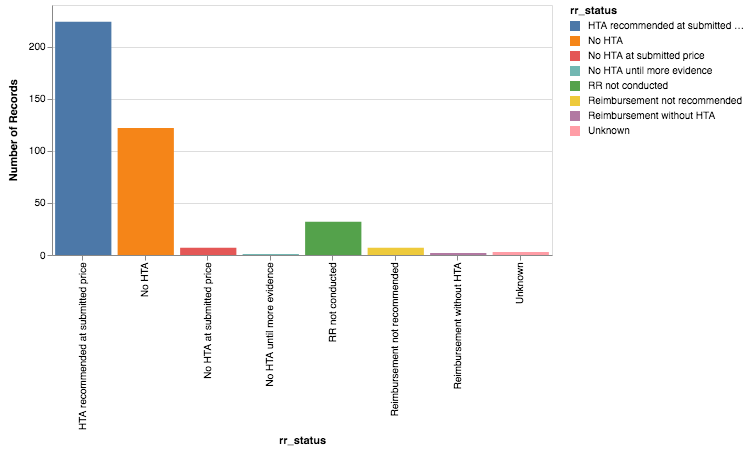

In [38]:
alt.Chart(df).mark_bar().encode(
    x='rr_status',
    y='count()',
    color='rr_status',).properties(
    width=500,
    height=250
).interactive()

##### Reason for Visualization 5:

This chart displays the ratio of 'rr_status' for all the drugs in the NCPE database. This helps us to identify the no.of drugs for each 'rr_status' an overall basis.

##### Information obtained from Visualization 5:

Maximum drugs belong to 'The HTA recommended at submitted price' (around 220 drugs) followed by 'No HTA' (120 drugs). There are few drugs that belong to 'RR not conducted' (30 drugs). Other statuses are very minimum compared to the above mentioned major ones.